In [71]:
# Lab | Customer Analysis Round 6

#For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

###   0. Get the data

###   1. Dealing with the data

#   1.1 looking at the shape + types of the dataframe
#   1.2 standardizing the header names
#   1.3 converting "effective_to_date" into datetime format + ignoring the errors
#   1.4 function shows numerical columns
#   1.5 function shows categorical columns
#   1.6 checking if there are NAN values. There are no NAN values
#   1.7 rounding the float columns to 2 decimal positions.


###  2. Explore the data

#   2.1 describing dataframe with the describe function
#   2.2 showing distribution plots for each numerical variable
#   2.3 setting feature and target variables
#   2.4 showing correlations between all the columns + covering all duplicates, unnecessary values
#   2.5 Outliners 
#          2.5.1 checking outliners with the boxplot 
#          2.5.2 checking the interquartile range for each column 
#          2.5.3 cut the outliners 
#          2.5.4 checking results
#          2.5.5 dropping the duplicates




###  3. Processing Data

#         3.1. making a copy to work with it
#         3.2 Normalize numerical data: replace the values <= 0 with a NaN value
#         3.3 Normalize numerical data: nan values replace with the mean of the column (Normalize numerical date)
#         3.4 droping the values with P value > 0,5 
#         3.5 Normalize numerical data: with the Normalizer function
#         3.6 Using standard scaler



###  4. Encoding Data 
#         4.1 normalizing the numerical data with the Normalizer function
#         4.2 checking out the label encoding + shape of x_normalized and le
#         4.3 spilting gender data in numerical data we can use for regression
#         4.4 looking at all object data we could split up for regression
#         4.5 Train-test split
#         4.6 MSE
#         4.7 RMSE
#         4.8 MAE

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm
import math

from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None


In [73]:
#   0. We are using the `marketing_customer_analysis.csv` file.

df = pd.read_csv('marketing_customer_analysis.csv')

In [74]:
###   1. Dealing with the data

#     1.1 looking at the shape + types of the dataframe
df.shape

(9134, 24)

In [75]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [76]:
#   1.2 standardizing the header names
cols = df.columns.str.lower()
new_columns = [col.replace(" ", "_") for col in cols]
df.columns = new_columns
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [77]:
#   1.3 converting "effective_to_date" into datetime format + ignoring the errors
pd.to_datetime(df["effective_to_date"])
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"], errors="coerce")

In [78]:
#   1.4 function shows numerical columns
df_num = pd.DataFrame(df.select_dtypes(include = np.number))
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [79]:
#   1.5 function shows categorical columns
df_obj = pd.DataFrame(df.select_dtypes(include = np.object))
df_obj

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [80]:
#   1.6 checking if there are NAN values. There are no NAN values
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [81]:
#   1.7 rounding the float columns to 2 decimal positions.
df["customer_lifetime_value"] = [round(i,2) for i in df["customer_lifetime_value"]]
df["total_claim_amount"] = [round(i,2) for i in df["total_claim_amount"]]

In [82]:
#   2.1 describing dataframe with the describe function

df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940471,6870.967600,1898.01,3994.25,5780.180,8962.170,83325.38
income,9134.0,37657.380009,30379.904734,0.00,0.00,33889.500,62320.000,99981.00
monthly_premium_auto,9134.0,93.219291,34.407967,61.00,68.00,83.000,109.000,298.00
months_since_last_claim,9134.0,15.097000,10.073257,0.00,6.00,14.000,23.000,35.00
months_since_policy_inception,9134.0,48.064594,27.905991,0.00,24.00,48.000,71.000,99.00
number_of_open_complaints,9134.0,0.384388,0.910384,0.00,0.00,0.000,0.000,5.00
number_of_policies,9134.0,2.966170,2.390182,1.00,1.00,2.000,4.000,9.00
total_claim_amount,9134.0,434.088834,290.500043,0.10,272.26,383.945,547.515,2893.24


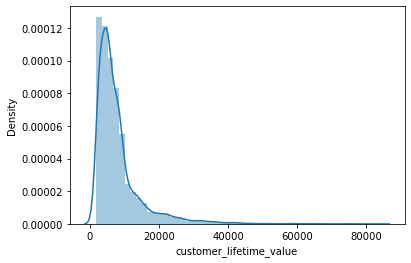

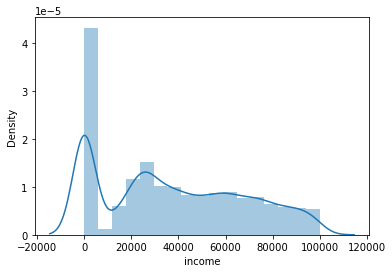

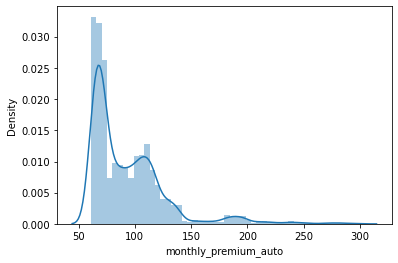

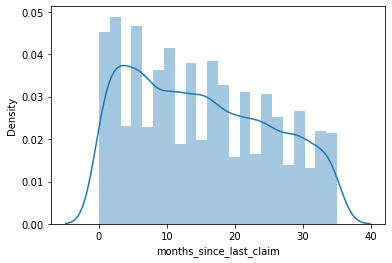

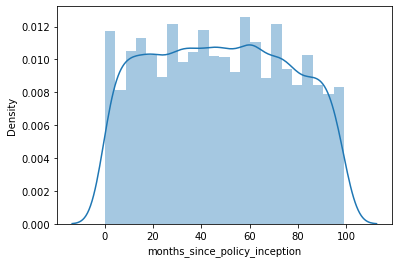

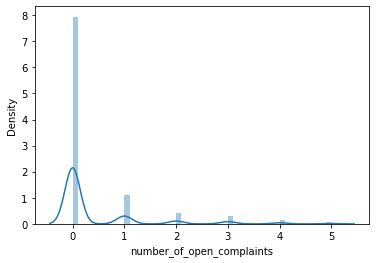

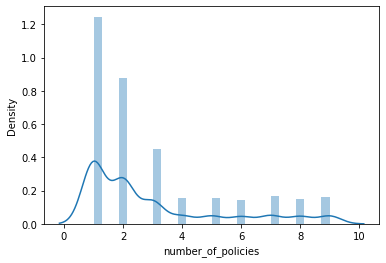

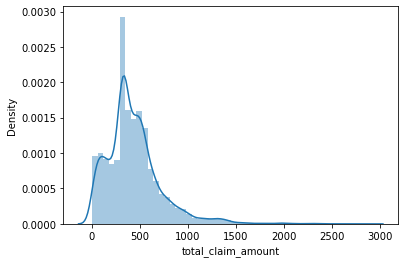

In [83]:
#   2.2 distribution plots for each numerical variable
for column in df_num.columns:
    sns.distplot(df_num[column])
    plt.show()

In [90]:
#   2.3 setting feature and target variables
y = df_num['total_claim_amount']
x = df_num.drop(['total_claim_amount'], axis=1)
x = sm.add_constant(x)
X_num = x.select_dtypes(include = np.number)
X_cat = x.select_dtypes(include = np.object)


model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:20:37   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

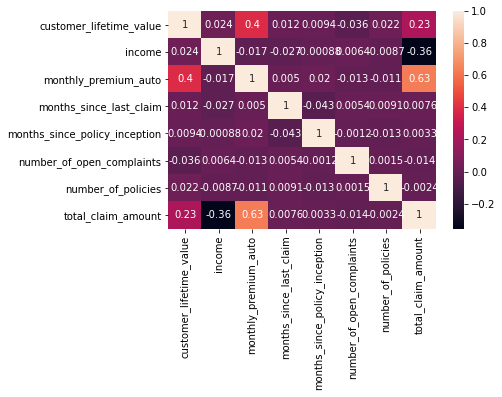

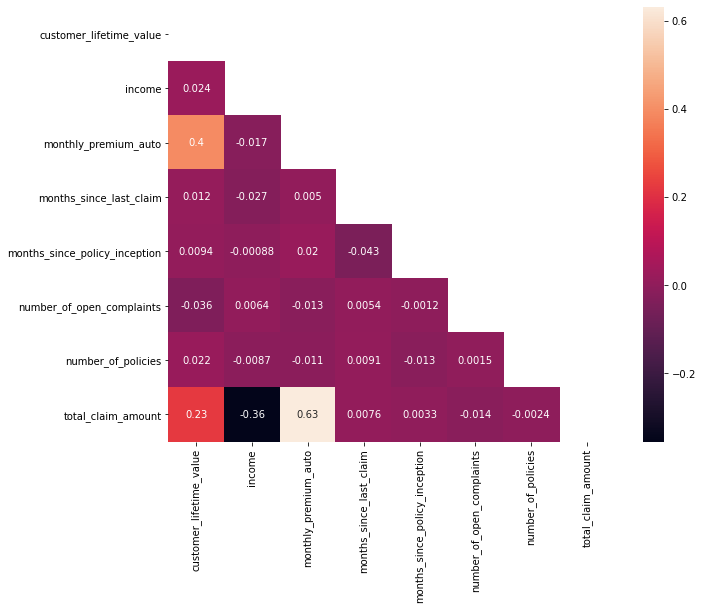

In [94]:
#   2.4 showing correlations between all the columns + covering all duplicates, unnecessary values
df_corr = df.corr()


for column in df_num.columns: 
    df_corr[(df_corr[column] > 0.8) | (df_corr[column] < -0.8)][[column, 'total_claim_amount']]

sns_plot = sns.heatmap(df_corr, annot=True)
figure = sns_plot.get_figure()    

mask = np.zeros_like(df_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr, mask=mask, annot=True)
plt.show()


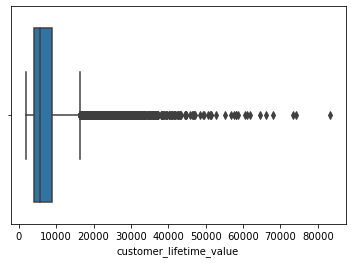

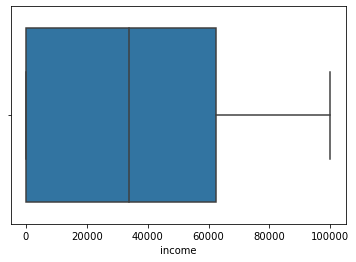

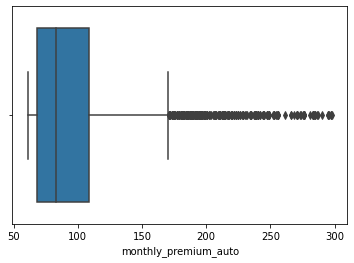

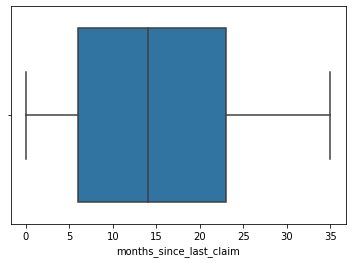

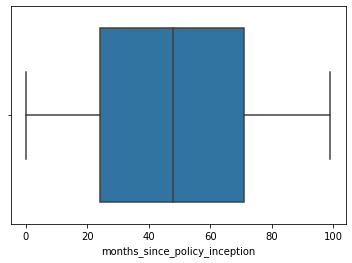

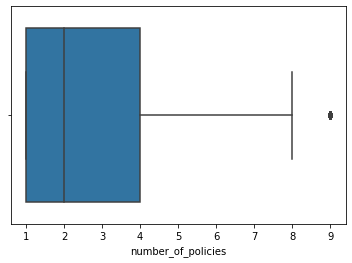

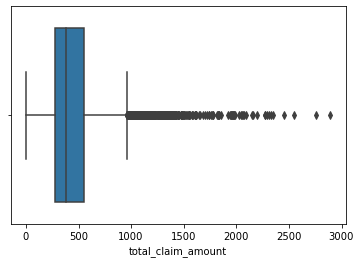

In [92]:
#   2.5 Outliners 
#          2.5.1 checking outliners with the boxplot 

for column in df_num.columns.drop("number_of_open_complaints"):
    sns.boxplot(df_num[column])
    plt.show()

In [103]:
#          2.5.2 checking the interquartile range for each column 

iqr_list = []

for column in df_num.columns:
    iqr = np.percentile(df[column],75) - np.percentile(df[column],25) 
    iqr_list.append(iqr)

iqr_list = [round(i,2) for i in iqr_list]
print(iqr_list)

[4967.92, 62320.0, 41.0, 17.0, 47.0, 0.0, 3.0, 275.26]


In [107]:
upper_limit_list = []
lower_limit_list = []


for column in df_num.columns: 
    upper_limit = np.percentile(df[column],75) + 1.5*iqr
    upper_limit_list.append(upper_limit)
    lower_limit = np.percentile(df[column],25) - 1.5*iqr
    lower_limit_list.append(lower_limit)

upper_limit_list = [round(i,2) for i in upper_limit_list]  
lower_limit_list = [round(i,2) for i in lower_limit_list]    
    
print("upper_limit:" ,upper_limit_list, "lower_limit:", lower_limit_list)

upper_limit: [9375.05, 62732.88, 521.88, 435.88, 483.88, 412.88, 416.88, 960.4] lowerlimit: [3581.37, -412.88, -344.88, -406.88, -388.88, -412.88, -411.88, -140.62]


In [124]:
#          2.5.3 cut the outliners 
df_num = df_num[(df_num['customer_lifetime_value']>lower_limit_list[0]) & (df_num['customer_lifetime_value']<upper_limit_list[0])]
df_num = df_num[(df_num['income']>lower_limit_list[1]) & (df_num['income']<upper_limit_list[1])]
df_num = df_num[(df_num['monthly_premium_auto']>lower_limit_list[2]) & (df_num['monthly_premium_auto']<upper_limit_list[2])]
df_num = df_num[(df_num['months_since_last_claim']>lower_limit_list[3]) & (df_num['months_since_last_claim']<upper_limit_list[3])]
df_num = df_num[(df_num['months_since_policy_inception']>lower_limit_list[4]) & (df_num['months_since_policy_inception']<upper_limit_list[4])]
df_num = df_num[(df_num['number_of_open_complaints']>lower_limit_list[5]) & (df_num['number_of_open_complaints']<upper_limit_list[5])]
df_num = df_num[(df_num['number_of_policies']>lower_limit_list[6]) & (df_num['number_of_policies']<upper_limit_list[6])]
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,6979.535903,0,94,13,42,0,8,1131.464935
3,7645.861827,0,106,18,65,0,7,529.881344
6,5380.898636,55350,67,0,13,0,9,321.600000
7,7216.100311,0,101,0,68,0,4,363.029680
9,7388.178085,28812,93,17,7,0,8,425.527834
...,...,...,...,...,...,...,...,...
9123,5678.050167,0,76,8,44,0,3,364.800000
9126,4628.995325,0,67,25,21,0,4,482.400000
9128,4100.398533,47761,104,16,58,0,1,541.282007
9131,8163.890428,0,85,9,37,3,2,790.784983


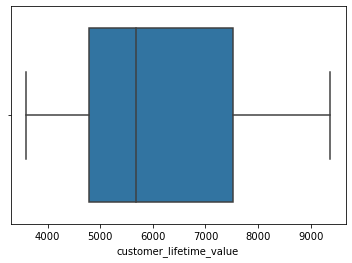

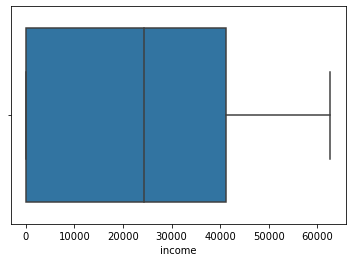

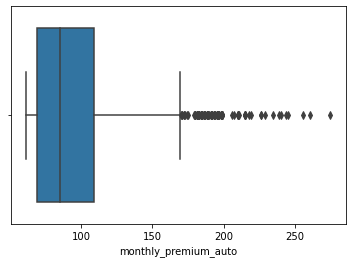

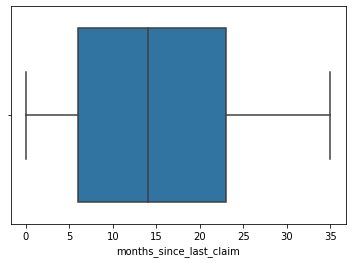

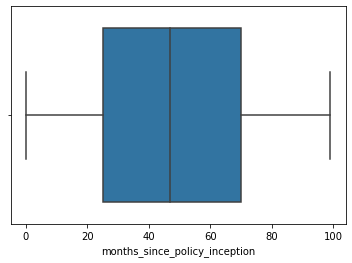

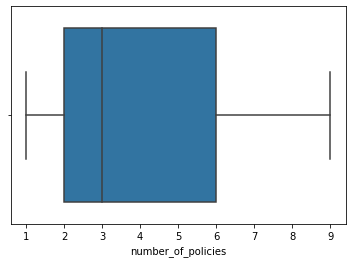

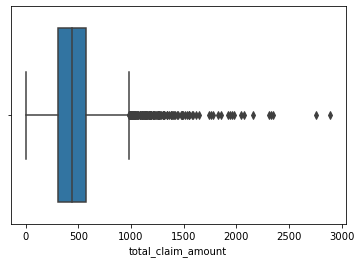

In [126]:
#          2.5.4 checking results

for column in df_num.columns.drop("number_of_open_complaints"):
    sns.boxplot(df_num[column])
    plt.show()

In [128]:
#          2.5.5 dropping the duplicates
df_num.drop_duplicates(subset=None, keep="first", inplace=True)
df_num.shape

(3401, 8)

In [130]:
#         3.1 making a copy to work with it

df1 = df_num.copy()
print(df1.columns)
df1.shape

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


(3401, 8)

In [135]:
#         3.2 replace the values <= 0 with a NaN value  
for column in df1.columns: 
    df1[column] = np.where(df1[column]<=0, np.NAN, df1[column])

In [136]:
#         3.3 nan values replace with the mean of the column 
for column in df1.columns: 
    df1[column] = df1[column].fillna(df1[column].mean())
df1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,6979.535903,36746.33592,94.0,13.000000,42.0,1.866391,8.0,1131.464935
3,7645.861827,36746.33592,106.0,18.000000,65.0,1.866391,7.0,529.881344
6,5380.898636,55350.00000,67.0,15.808127,13.0,1.866391,9.0,321.600000
7,7216.100311,36746.33592,101.0,15.808127,68.0,1.866391,4.0,363.029680
9,7388.178085,28812.00000,93.0,17.000000,7.0,1.866391,8.0,425.527834
...,...,...,...,...,...,...,...,...
9121,4140.648654,36746.33592,123.0,5.000000,35.0,2.000000,1.0,590.400000
9126,4628.995325,36746.33592,67.0,25.000000,21.0,1.866391,4.0,482.400000
9128,4100.398533,47761.00000,104.0,16.000000,58.0,1.866391,1.0,541.282007
9131,8163.890428,36746.33592,85.0,9.000000,37.0,3.000000,2.0,790.784983


In [140]:
#         3.4 droping the values with P value > 0,5 
y = df1["total_claim_amount"]
x = df1.drop(['total_claim_amount', "months_since_last_claim", ], axis=1)
x = sm.add_constant(x)
X_num = x.select_dtypes(include = np.number)
X_cat = x.select_dtypes(include = np.object)


model = sm.OLS(y,x).fit()
print(model.summary())
#the first OLS Regression Results showed a R-squared from 0,519, so I have not improved the model. 

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     365.3
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:20:18   Log-Likelihood:                -23209.
No. Observations:                3401   AIC:                         4.643e+04
Df Residuals:                    3394   BIC:                         4.648e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [143]:
#         3.5 normalizing the numerical data with the Normalizer function
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(3401, 7)


In [165]:
#         3.6 Using standard scaler
transformer = StandardScaler() 
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized.shape
pd.DataFrame(x_standardized)


,0,1,2,3,4,5,6
0,0.0,0.527885,0.000000,0.086301,-0.241615,-4.365081e-16,1.579066
1,0.0,0.946466,0.000000,0.505402,0.597593,-4.365081e-16,1.196232
2,0.0,-0.476365,1.637954,-0.856676,-1.299746,-4.365081e-16,1.961901
3,0.0,0.676493,0.000000,0.330777,0.707055,-4.365081e-16,0.047728
4,0.0,0.784591,-0.698576,0.051376,-1.518669,-4.365081e-16,1.579066
...,...,...,...,...,...,...,...
3396,0.0,-1.255479,0.000000,1.099129,-0.497026,2.626559e-01,-1.100776
3397,0.0,-0.948704,0.000000,-0.856676,-1.007847,-4.365081e-16,0.047728
3398,0.0,-1.280764,0.969783,0.435552,0.342182,-4.365081e-16,-1.100776
3399,0.0,1.271887,0.000000,-0.228025,-0.424051,2.228514e+00,-0.717942


<AxesSubplot:ylabel='Density'>

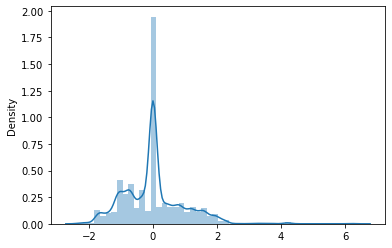

In [170]:
sns.distplot(x_standardized.T)


In [222]:
###  4. Encoding Data 

df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


In [ ]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [200]:
#         4.1 normalizing the numerical data with the Normalizer function
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(3401, 7)


In [203]:
#         4.2 checking out the label encoding + shape of x_normalized and le
le = LabelEncoder().fit(df.gender).transform(df.gender)
le[:20]

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [202]:
x_normalized.shape, le.shape

((3401, 7), (9134,))

In [204]:
#         4.3 spilting gender data in numerical data we can use for regression
df.gender.unique()
gender_data = pd.get_dummies(df.gender, drop_first=True) 
gender_data

,M
0,0
1,0
2,0
3,1
4,1
...,...
9129,1
9130,0
9131,1
9132,1


In [207]:
df.gender.value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [210]:
cat = df.select_dtypes('object')
cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [211]:
#         4.4 looking at all object data we could split up for regression
for column in cat.columns:
    print(column, cat[column].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [212]:
#         4.5  Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression()

In [213]:
predictions  = model.predict(X_test)
predictions.shape

(1021,)

In [217]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.38811020510433014, 226.90309329936127, 51485.01374881865)

In [218]:
#         4.6 MSE
mse = mean_squared_error(y_test, predictions)
print(mse)

51485.01374881865


In [219]:
#        4.7 RMSE
rmse = math.sqrt(mse)
print(rmse)

226.90309329936127


In [220]:
#        4.8 R2
r2 = r2_score(y_test, predictions)
print(r2)

0.38811020510433014


In [221]:
#        4.8 MAE
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

0.3838819439352583
